In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pandas.io.json import json_normalize
import time
import datetime as dt
import glob
import seaborn as sns
from colour import Color
import folium
from folium import plugins
from itertools import cycle, islice
import scipy.stats as stats
from scipy.stats import norm

In [2]:
def all_csv_df():
    '''
    Loops through the .csv in /raw and concatonates them into 1 Dataframe
    '''
    path = r'/Users/AaronLee/Documents/GalvanizeDSI/UnsplashEDA/raw'
    all_files = glob.glob(path + "/*.csv")

    list_holder = []

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        list_holder.append(df)

    US_df = pd.concat(list_holder, axis=0, ignore_index=True)
    return US_df

In [68]:
full_df = all_csv_df()
Unsplash_df = full_df.drop_duplicates('id')
Unsplash_df = Unsplash_df[['id', 'user.username', 'created_at', 'views', 'likes', 'downloads', 'exif.make', 'exif.aperture', 'location.country', 'user.total_photos', 'user.total_collections', 'user.instagram_username', 'user.twitter_username', 'color']]
Unsplash_df['dl_percent'] = (Unsplash_df['downloads'] / Unsplash_df['views']) * 100
Unsplash_df['like_percent'] = (Unsplash_df['likes'] / Unsplash_df['views']) * 100
Unsplash_df

,id,user.username,created_at,views,likes,downloads,exif.make,exif.aperture,location.country,user.total_photos,user.total_collections,user.instagram_username,user.twitter_username,color,dl_percent,like_percent
0,orVg0K35hlw,anitaaustvika,2019-08-11T02:16:27-04:00,714716,118,1460,NIKON CORPORATION,2.8,NaN,336,0,rareflower_photography,NaN,#26150A,0.204277,0.016510
1,xvPXJy2su0g,schluditsch,2019-08-18T20:46:07-04:00,301662,29,567,Canon,4.5,NaN,32,9,schluditsch,NaN,#201D1A,0.187959,0.009613
2,QS-19iV-uC4,janellesoto_,2019-08-27T05:47:45-04:00,280267,66,1175,SONY,7.1,NaN,23,0,janellesoto_,NaN,#553E42,0.419243,0.023549
3,vP7gLpFYyq4,elijahsad,2019-08-06T05:46:58-04:00,525334,56,1309,SONY,1.8,NaN,97,0,elijah_tmn,Elijah_sad,#E9E7EC,0.249175,0.010660
4,wzEGhQJOEbA,mrthetrain,2019-08-22T16:15:50-04:00,219458,6,426,Canon,1.8,NaN,349,62,mr_theTrain,mrtheTrain,#E6E8D6,0.194115,0.002734
5,GJCWFap8gWE,byrdman85,2019-08-09T16:30:17-04:00,444788,16,661,NaN,NaN,NaN,98,1,Ash_photography_85,NaN,#F4F6F8,0.148610,0.003597
6,gs7biLqCDDQ,worldsbetweenlines,2019-08-12T01:38:36-04:00,421988,54,946,Canon,1.4,NaN,1188,27,shot.with.canon,LoveTheBicycle,#E9DCCF,0.224177,0.012797
7,yhz3Nus7zS0,ekrulila,2019-09-02T05:36:41-04:00,85628,19,294,NIKON CORPORATION,2.0,NaN,17,0,ekrulila,ekrulila,#151414,0.343346,0.022189
8,FESBgp8i9lY,hadleyjin_,2019-08-13T03:42:51-04:00,1124169,283,2753,Canon,4.0,NaN,128,0,hadleyjin,HadleyJin,#8C8893,0.244892,0.025174
9,dqcAlGZb4KM,ellienelie,2019-08-08T07:41:49-04:00,413072,43,765,Canon,2.8,NaN,94,1,ellieelien,NaN,#CBD0D1,0.185198,0.010410


In [9]:
# Cutting off outliers (<1% df >99%)
Unsplash_df = Unsplash_df[Unsplash_df['dl_percent'] < 0.6917562385755861]
Unsplash_df = Unsplash_df[Unsplash_df['dl_percent'] > 0.056323473476202715]

In [8]:
full_df = full_df.drop_duplicates('id')

In [ ]:
# full_df.describe()

In [ ]:
# for col in full_df.columns: 
#     print(col) 

# Does Camera Model make a Difference?

In [ ]:
Unsplash_df['exif.make'].value_counts()

### Breakdown of Camera usage (Top 5)

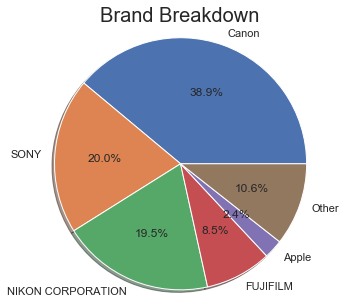

In [67]:
# pie chart of workers
labels = ['Canon', 'SONY', 'NIKON CORPORATION', 'FUJIFILM', 'Apple', 'Other']
sizes = [Unsplash_df['exif.make'].value_counts()[0],
         Unsplash_df['exif.make'].value_counts()[1],
         Unsplash_df['exif.make'].value_counts()[2],
         Unsplash_df['exif.make'].value_counts()[3],
         Unsplash_df['exif.make'].value_counts()[4],
         sum(Unsplash_df['exif.make'].value_counts()[5:])
        ]

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Brand Breakdown', fontsize=20)
plt.show()

In [ ]:
# x1 = list(Unsplash_df[Unsplash_df['main_color'] == 'black']['exif.make'])
# x2 = list(Unsplash_df[Unsplash_df['main_color'] == 'white']['exif.make'])
# x3 = list(Unsplash_df[Unsplash_df['main_color'] == 'yellow']['exif.make'])
# x4 = list(Unsplash_df[Unsplash_df['main_color'] == 'red']['exif.make'])
# x5 = list(Unsplash_df[Unsplash_df['main_color'] == 'cyan']['exif.make'])

# # Assign colors for each airline and the names
# colors = ['black', 'grey', 'yellow', 'red', 'cyan']
# names = ['black', 'white', 'yellow',
#          'red', 'cyan']
         
# # Make the histogram using a list of lists
# # Normalize the flights and assign colors and names
# plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), density=False,
#         color = colors, label=names)

# # Plot formatting
# plt.xticks(rotation=45)
# plt.legend()
# plt.xlabel('Colors')
# plt.ylabel('Total Colors')
# plt.title('Side-by-Side Histogram with Camera Color Profile');

In [ ]:
model_df = Unsplash_df.groupby(['exif.make']).mean()

In [ ]:
target_model = model_df.loc[['Canon', 'SONY', 'NIKON CORPORATION', 'FUJIFILM', 'Apple']].sort_index(ascending=False).reset_index()

In [ ]:
target_model

In [ ]:
sns.catplot(x='exif.make', y='views', data=target_model, kind='bar', height=7)
plt.title('Camera Model Average Views', fontsize=20);

In [ ]:
sns.catplot(x='exif.make', y='dl_percent', data=target_model, kind='bar', height=7)
plt.title('Camera Model Average Views', fontsize=20);

# Is More Total Photos Correlated with more Engagment?

In [ ]:
user_group = Unsplash_df.groupby(['user.username'])

In [ ]:
user_group.first()

In [ ]:
x = Unsplash_df['user.total_photos'].tolist()
y_view = Unsplash_df['views'].tolist()

plt.scatter(x, y_view, alpha=0.2)
plt.title('Total Photo to Views', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Views', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 2000)
plt.ylim(0, 1500000);

# Aperture Comparison

In [ ]:
x1 = Unsplash_df['exif.aperture'].tolist()

plt.scatter(x1, y_view, alpha=0.2)
plt.title('Aperture to Views', fontsize=20)
plt.xlabel('User Total Photos', fontsize=20)
plt.ylabel('Views', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 17)
plt.ylim(0, 1500000);

# Hex --> RBG

In [ ]:
# Unsplash_df['color'].value_counts()

In [16]:
#Appending colors to a singular list
color_list = Unsplash_df['color'].tolist()
rgb_list = []

for i in color_list:
    h = i.lstrip('#')
    rgb_list.append(tuple(int(h[i:i+2], 16) for i in (0, 2, 4)))

#Splitting into 3 categories
red = []
green = []
blue = []

for i in rgb_list:
    red.append(i[0])
    
for i in rgb_list:
    green.append(i[1])

for i in rgb_list:
    blue.append(i[2])
    
# Making new columns to dataframe
Unsplash_df['rgb'] = rgb_list
Unsplash_df['red'] = red
Unsplash_df['green'] = green
Unsplash_df['blue'] = blue

In [ ]:
'''
red_plot = Unsplash_df['red'].value_counts().plot(kind='hist', bins=30, alpha=0.4)
green_plot = Unsplash_df['green'].value_counts().plot(kind='hist', bins=30, alpha=0.4)
blue_plot = Unsplash_df['blue'].value_counts().plot(kind='hist', bins=30, alpha=0.4);
'''

## Distribution Based on Color

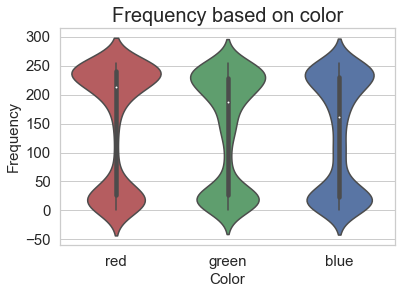

In [17]:
#Violin plot of each color
sns.set(style='whitegrid')
my_pal = {"red": "r", "green": "g", "blue":"b"}
sns.violinplot(data=Unsplash_df[['red', 'green', 'blue']], palette=my_pal)
plt.title('Frequency based on color', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Color', fontsize=15)
plt.ylabel('Frequency', fontsize=15);

In [ ]:
# Unsplash_df.describe()
# r = 152
# g = 141
# b = 133

### Seperation values function for each color

In [18]:
#Categorizes color in a binary way

bin_list = []

for i in rgb_list:
    if i[0] > 152 and i[1] < 141 and i[2] < 133:
        bin_list.append('red')
    elif i[0] > 152 and i[1] < 141 and i[2] > 133:
        bin_list.append('magenta')
    elif i[0] > 152 and i[1] > 141 and i[2] < 133:
        bin_list.append('yellow')
    elif i[0] > 152 and i[1] > 141 and i[2] > 133:
        bin_list.append('white')
    elif i[0] < 152 and i[1] > 141 and i[2] > 133:
        bin_list.append('cyan')
    elif i[0] < 152 and i[1] > 141 and i[2] < 133:
        bin_list.append('lime')
    elif i[0] < 152 and i[1] < 141 and i[2] > 133:
        bin_list.append('blue')
    else:
        bin_list.append('black')

#Makes new column with seperated color
Unsplash_df['main_color'] = bin_list

#Create average color from RGB values
Unsplash_df_list = ((Unsplash_df['red'] + Unsplash_df['green'] + Unsplash_df['blue']) // 3).tolist()
Unsplash_df['avg_colors'] = Unsplash_df_list

In [ ]:
# Unsplash_df.groupby('main_color').count()

In [ ]:
Unsplash_df.head()

# Color(est) Photos Analysis

#### White(est)

In [19]:
#Make Dataframe for just only white
white_df = Unsplash_df[Unsplash_df['main_color'] == 'white']
white_df.sort_values(['avg_colors', 'dl_percent'], ascending=False)

,id,user.username,created_at,views,likes,downloads,exif.make,exif.aperture,location.country,user.total_photos,...,user.twitter_username,color,dl_percent,like_percent,rgb,red,green,blue,main_color,avg_colors
3739,M35j-B2q8Rw,jonathanborba,2019-09-08T11:55:34-04:00,220501,96,968,Canon,1.8,NaN,596,...,NaN,#FFFFFF,0.439000,0.043537,"(255, 255, 255)",255,255,255,white,255
2036,8RN9NPDwWgE,pavelanoshin,2019-08-17T21:59:56-04:00,346764,17,917,Canon,1.8,NaN,89,...,pavelanoshin,#FFFFFF,0.264445,0.004902,"(255, 255, 255)",255,255,255,white,255
87,K8lQfACC8WE,wx1993,2019-09-01T22:03:09-04:00,72114,18,190,Canon,4.0,NaN,847,...,NaN,#FFFFFF,0.263472,0.024960,"(255, 255, 255)",255,255,255,white,255
535,lO_U06g1WfM,drew_beamer,2019-09-01T12:45:20-04:00,228636,41,590,Canon,5.6,United States,104,...,beamomatic9000,#FFFFFF,0.258052,0.017932,"(255, 255, 255)",255,255,255,white,255
3427,89JjCbf_NvA,steve3p_0,2019-08-11T16:15:23-04:00,808769,130,2043,GoPro,2.8,NaN,608,...,NaN,#FFFFFF,0.252606,0.016074,"(255, 255, 255)",255,255,255,white,255
4951,BsS0gMB1kBU,itsbluestudio,2019-08-12T05:31:37-04:00,409081,19,1029,FUJIFILM,8.0,NaN,223,...,itsBlueStudio,#FFFFFF,0.251539,0.004645,"(255, 255, 255)",255,255,255,white,255
1461,nIvrzJPFC-Y,judebeck,2019-08-21T01:59:50-04:00,323534,17,714,NIKON CORPORATION,2.2,NaN,71,...,NaN,#FFFFFF,0.220688,0.005254,"(255, 255, 255)",255,255,255,white,255
1093,kEe_mXQLU4c,jonnysplsh,2019-09-08T17:18:52-04:00,387950,84,846,Canon,2.8,NaN,48,...,jonnycpic,#FFFFFF,0.218069,0.021652,"(255, 255, 255)",255,255,255,white,255
268,lZXHJulIF1M,mitsuo_z,2019-08-17T23:41:50-04:00,316079,4,650,Canon,5.6,NaN,165,...,NaN,#FFFFFF,0.205645,0.001266,"(255, 255, 255)",255,255,255,white,255
727,FpPpqiu2n7I,heyitsadamk,2019-08-22T16:38:43-04:00,383930,43,768,NIKON CORPORATION,2.2,United States,2,...,NaN,#FFFFFF,0.200036,0.011200,"(255, 255, 255)",255,255,255,white,255


#### Black(est)

In [20]:
black_df = Unsplash_df[Unsplash_df['main_color'] == 'black']
black_df.sort_values(['avg_colors', 'dl_percent'])

,id,user.username,created_at,views,likes,downloads,exif.make,exif.aperture,location.country,user.total_photos,...,user.twitter_username,color,dl_percent,like_percent,rgb,red,green,blue,main_color,avg_colors
1007,2iVAE0914hs,marcuschen1,2019-08-12T11:01:03-04:00,423992,11,468,FUJIFILM,1.0,NaN,60,...,NaN,#000100,0.110379,0.002594,"(0, 1, 0)",0,1,0,black,0
4732,CygFgxHqfSI,anniespratt,2019-08-12T04:20:19-04:00,461071,15,597,NaN,NaN,NaN,6625,...,anniespratt,#000000,0.129481,0.003253,"(0, 0, 0)",0,0,0,black,0
897,j6Y4lyBFVdc,ussi,2019-08-10T16:14:59-04:00,1770397,56,2593,Canon,4.5,United States,80,...,NaN,#000000,0.146464,0.003163,"(0, 0, 0)",0,0,0,black,0
445,89xx7Icy38M,raspopovamarisha,2019-08-23T14:00:02-04:00,333750,21,551,NIKON CORPORATION,NaN,NaN,61,...,NaN,#000000,0.165094,0.006292,"(0, 0, 0)",0,0,0,black,0
2018,aoqXcvxI9NU,mreizberg,2019-08-09T13:35:40-04:00,689364,40,1359,NaN,NaN,Lithuania,6,...,NaN,#000000,0.197138,0.005802,"(0, 0, 0)",0,0,0,black,0
3435,Yzqq5YssljQ,mreizberg,2019-08-09T13:35:39-04:00,783468,128,1608,NaN,NaN,Lithuania,6,...,NaN,#000000,0.205241,0.016338,"(0, 0, 0)",0,0,0,black,0
237,j8QdjggaCPA,hadleyjin_,2019-08-18T22:18:16-04:00,330993,17,754,Canon,6.3,NaN,128,...,HadleyJin,#000000,0.227799,0.005136,"(0, 0, 0)",0,0,0,black,0
111,15mkCCDr9iY,karljkhedin,2019-09-03T07:47:35-04:00,191552,43,568,NaN,NaN,NaN,104,...,NaN,#000001,0.296525,0.022448,"(0, 0, 1)",0,0,1,black,0
933,fRqMGHKRDl8,drew_beamer,2019-09-01T12:45:20-04:00,153869,27,588,Canon,4.5,NaN,104,...,beamomatic9000,#000000,0.382143,0.017547,"(0, 0, 0)",0,0,0,black,0
1025,VneWikA0NUI,ninjason,2019-09-03T22:05:43-04:00,119263,66,529,Canon,2.8,NaN,1557,...,NaN,#000000,0.443558,0.055340,"(0, 0, 0)",0,0,0,black,0


In [ ]:
# print(white_df.mean())
# print(black_df.mean())

In [ ]:
#White_mean = 0.244
#Black_mean = 0.257
ax = white_df.plot.scatter(x='avg_colors', y='dl_percent', c='avg_colors', colorbar = False, colormap='viridis', alpha=0.7, title='Download rate based on intensity', figsize= (10, 10), fontsize=15)
black_df.plot.scatter(x='avg_colors', y='dl_percent', c='avg_colors', colorbar = False, colormap='magma', alpha=0.7, ax=ax);

# Best 'Engagement'

In [ ]:
#dl_percent = 0.236552
#like_percent = 0.012917
ax = Unsplash_df.plot.scatter(x='views', y='dl_percent', c='avg_colors', colorbar = False, colormap='viridis', alpha=0.7, title='Download to Like Percentage', figsize= (10, 10), fontsize=15)
Unsplash_df.plot.scatter(x='views', y='like_percent', c='avg_colors', colorbar = False, colormap='magma', alpha=0.7, ax=ax)
plt.xlim(9, 500000);

In [ ]:
# Unsplash_df.mean()

# Color and Camera Correlation

In [ ]:
Unsplash_df['main_color'].value_counts()

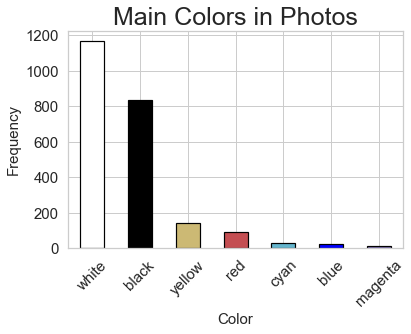

In [66]:
#Histogram of color breakdown
my_colors = list(islice(cycle(['w', 'black', 'y', 'r', 'c', 'blue', 'm']), None, len(Unsplash_df)))
Unsplash_df['main_color'].value_counts().plot.bar(color=my_colors, edgecolor= 'black', linewidth=1.2)
plt.title('Main Colors in Photos', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Color', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=45);

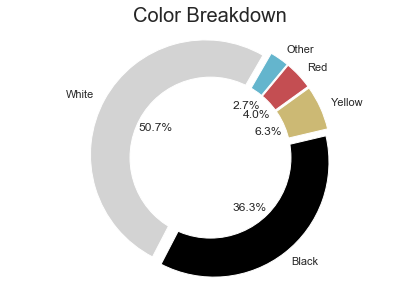

In [42]:
# Pie chart
labels = ['White', 'Black', 'Yellow', 'Red', 'Other']
sizes = [1168, 836, 144, 93, 29+23+ 10]
#colors
colors = list(islice(cycle(['lightgrey', 'black', 'y', 'r', 'c']), None, len(Unsplash_df)))
 
#explsion
explode = (.05,0.05,0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=60, pctdistance=0.50, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title('Color Breakdown', fontsize=20)
plt.show()

In [ ]:
canon = Unsplash_df[Unsplash_df['exif.make'] == 'Canon'].groupby('main_color')
nikon = Unsplash_df[Unsplash_df['exif.make'] == 'NIKON CORPORATION'].groupby('main_color')
sony = Unsplash_df[Unsplash_df['exif.make'] == 'SONY'].groupby('main_color')
fujifilm = Unsplash_df[Unsplash_df['exif.make'] == 'FUJIFILM'].groupby('main_color')
apple = Unsplash_df[Unsplash_df['exif.make'] == 'Apple'].groupby('main_color')

In [ ]:
canon_dict = canon['main_color'].count().to_dict()
nikon_dict = nikon['main_color'].count().to_dict()
sony_dict = sony['main_color'].count().to_dict()
fujifilm_dict = fujifilm['main_color'].count().to_dict()
apple_dict = apple['main_color'].count().to_dict()

In [ ]:
labels = ['White', 'Black', 'Yellow', 'Red', 'Cyan', 'Blue', 'Magenta']
sizes = [canon_dict['white'],
         canon_dict['black'],
         canon_dict['yellow'],
         canon_dict['red'],
         canon_dict['cyan'],
         canon_dict['blue'], 
         canon_dict['magenta']
        ]
my_colors = ['w', 'darkgrey', 'yellow', 'r', 'cyan', 'blue', 'magenta']

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, colors=my_colors)
ax1.axis('equal')
plt.title('Canon Color Breakdown', fontsize=20)
plt.legend()
plt.show()

In [ ]:
sony_dict

In [ ]:
X = np.arange(len(canon_dict))
ax = plt.subplot(111)
ax.bar(X, canon_dict.values(), width=0.2, color='b', align='center')
ax.bar(X-0.2, nikon_dict.values(), width=0.2, color='g', align='center')
# ax.bar(X-0.4, sony_dict.values(), width=0.2, color='y', align='center')
# ax.bar(X-0.6, fujifilm_dict.values(), width=0.2, color='m', align='center')
# ax.bar(X-0.8, apple_dict.values(), width=0.2, color='c', align='center')
# ax.legend(('Canon','Nikon'))
plt.xticks(X, canon_dict.keys())
plt.title("Color Comparison", fontsize=17)
plt.show()

In [ ]:
plt.bar(canon_dict.keys(), canon_dict.values())

In [ ]:
Unsplash_df[['exif.make', 'main_color']].dropna()

# Which test should we use?

find percentile of a dl_percentage
99% and 99.9% and figure out why it is an outlier
Show the class the outlier but average photo

Constraining for photos that have a certain number of 
Make a density of views and downloads

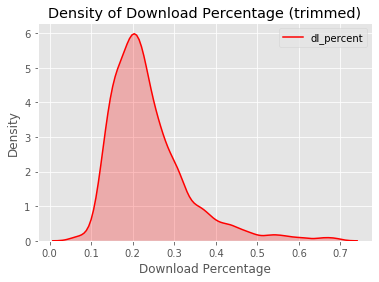

In [12]:
# Plotting density plot to check if it follows a normal distribution
p1=sns.kdeplot(Unsplash_df['dl_percent'], shade=True, color="r")
p1.set_xlabel('Download Percentage')
p1.set_ylabel('Density')
p1.set_title('Density of Download Percentage (trimmed)');
# It is not normal but might be since we did not control for outliers. 
# Looks like it has a right long tail

In [13]:
# Assuming the alpha = 0.05, p-value was 0.3301 which is larger, it is not a normal distribution
stats.normaltest(Unsplash_df['dl_percent'])

NormaltestResult(statistic=757.4606568411255, pvalue=3.307563856692732e-165)

In [14]:
print ('This is the 99% of dl_percent: {}'.format(np.percentile(Unsplash_df['dl_percent'], 99)))
print ('This is the 1% of dl_percent: {}'.format(np.percentile(Unsplash_df['dl_percent'], 1)))
# This helps us to determine the cut-off

This is the 99% of dl_percent: 0.5807231027523082
This is the 1% of dl_percent: 0.1103805079357836


In [ ]:
# Cut off top and bottom 1% of download percentage
Unsplash_df = Unsplash_df[Unsplash_df['dl_percent'] < 0.6917562385755861]
Unsplash_df = Unsplash_df[Unsplash_df['dl_percent'] > 0.056323473476202715]

In [ ]:
p1=sns.kdeplot(Unsplash_df['dl_percent'], shade=True, color="r")

In [ ]:
# Seeing if the log function of the dl_percent is normal
p1=sns.kdeplot(np.log(Unsplash_df['dl_percent']), shade=True, color="r")
# Not really normal, but MIGHT be

In [ ]:
p1=sns.kdeplot(Unsplash_df['views'], shade=True, color="r")

In [ ]:
print ('This is the 99% of views: {}'.format(np.percentile(Unsplash_df['views'], 99)))
print ('This is the 1% of views: {}'.format(np.percentile(Unsplash_df['views'], 1)))
# This helps us to determine the cut-off

In [ ]:
p2=sns.kdeplot(Unsplash_df['downloads'], shade=True, color="b")

In [ ]:
print ('This is the 99% of downloads: {}'.format(np.percentile(Unsplash_df['downloads'], 99)))
print ('This is the 1% of downloads: {}'.format(np.percentile(Unsplash_df['downloads'], 1)))
# This helps us to determine the cut-off

In [ ]:
plt.scatter(Unsplash_df['views'], Unsplash_df['downloads'], alpha=.3);

# Hypothesis Testing

In [ ]:
# Unsplash_df['user.username'].value_counts()

In [ ]:
# Unsplash_df.sum()

In [ ]:
user_df = Unsplash_df[Unsplash_df['user.username'] == 'anitaaustvika']

In [ ]:
# user_df.describe()

In [ ]:
#Getting values for binomial test
total_view_sum = sum(Unsplash_df['views'])
total_dl_sum = sum(Unsplash_df['downloads'])
total_dl_mean = total_dl_sum / total_view_sum

user_view_sum = sum(user_df['views'])
user_dl_sum = sum(user_df['downloads'])

In [ ]:
binomial = stats.binom(n=user_view_sum,p=total_dl_mean)
p_value = 1 - binomial.cdf(user_dl_sum)
p_value

In [ ]:
fig, axs = plt.subplots(1, figsize=(16,4))
#plot binomial distribution
bars = axs.bar(range(45000), 
              [binomial.pmf(i) for i in range(45000)], 
              color="grey", edgecolor='black', align="center")
axs.set_xlim(38000, 45000)
axs.set_ylim(0,0.003)

#p-value area: red
for i in range(44403, 45000):
    bars[i].set_color('red')
    
# Set title & label    
axs.set_title("P-value Reigon", fontsize = 20)
# Font size setting on each axis
axs.tick_params(axis='both', which='major', labelsize=20)

In [ ]:
sns.distplot(Unsplash_df['dl_percent'], hist=True, kde=True, 
             bins=1000,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
plt.title('Density of Download Percentage')
plt.xlabel('Downloads / Views')
plt.xlim(0,0.8);

### Color(white) hypothesis test to total

In [ ]:
x1 = list(Unsplash_df[Unsplash_df['exif.make'] == 'Canon']['main_color'])
x2 = list(Unsplash_df[Unsplash_df['exif.make'] == 'SONY']['main_color'])
x3 = list(Unsplash_df[Unsplash_df['exif.make'] == 'NIKON CORPORATION']['main_color'])
x4 = list(Unsplash_df[Unsplash_df['exif.make'] == 'FUJIFILM']['main_color'])
x5 = list(Unsplash_df[Unsplash_df['exif.make'] == 'Apple']['main_color'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['Canon', 'Sony', 'Nikon',
         'Fujifilm', 'Apple']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), density=False,
        color = colors, label=names)

# Plot formatting
plt.xticks(rotation=45)
plt.legend()
plt.xlabel('Colors')
plt.ylabel('Normalized Colors')
plt.title('Side-by-Side Histogram with Camera Color Profile');

In [ ]:
white_df = Unsplash_df[Unsplash_df['main_color'] == 'white']
black_df = Unsplash_df[Unsplash_df['main_color'] == 'black']

In [ ]:
# white_df.describe()
# sum(black_df['downloads'])

In [ ]:
#Getting values for binomial test
total_white_view_sum = sum(white_df['views'])
total_white_dl_sum = sum(white_df['downloads'])
total_white_dl_mean = white_df['dl_percent'].mean()

total_black_view_sum = sum(black_df['views'])
total_black_dl_sum = sum(black_df['downloads'])
total_black_dl_mean = black_df['dl_percent'].mean()

In [ ]:
binomial1 = stats.binom(n=total_white_view_sum,p=total_dl_mean)
p_value_white = 1 - binomial1.cdf(total_white_dl_sum)
p_value_white

In [ ]:
binomial2 = stats.binom(n=total_black_view_sum,p=total_dl_mean)
p_value_black = binomial2.cdf(total_black_dl_sum)
p_value_black

In [ ]:
ax = sns.distplot(Unsplash_df['dl_percent'],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  )
ax.set(xlabel='Download Percent', ylabel='Frequency')
plt.xlim(0, .8);

In [ ]:
x = Unsplash_df['dl_percent']
y = white_df['dl_percent']

bins = 100

plt.hist(x, bins, alpha=0.5, label='Sample download percentage')
plt.hist(y, bins, alpha=0.5, label='White color download percentage')
plt.xlim(0, 0.8)
plt.legend(loc='upper right')
plt.show()

In [ ]:
x = Unsplash_df['dl_percent']
y = black_df['dl_percent']

bins = 100

plt.hist(x, bins, alpha=0.5, label='Sample download percentage')
plt.hist(y, bins, alpha=0.5, label='Black color download percentage')
plt.xlim(0, 0.8)
plt.legend(loc='upper right')
plt.show()

In [ ]:
Unsplash_normal = norm.rvs(size=10000,loc=1908,scale=1)
white_normal = norm.rvs(size=10000,loc=1912,scale=1)


ax = sns.distplot(Unsplash_normal,
                  bins=100,
                  kde=True,
                  color='blue')
ax = sns.distplot(white_normal,
                  bins=100,
                  kde=True,
                  color='red')
ax.set(xlabel='Normal', ylabel='Frequency')
plt.title('Unsplash to White Color Download Rate');

In [ ]:
df = Unsplash_df[['dl_percent']]
df['white_color'] = white_df['dl_percent']
ax = df.plot.hist(bins=100, alpha=0.5, density=True)
plt.xlim(0, 0.7);

In [ ]:
'''
#Box Plotting the average of 2 groups
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
# plt.xlim(0, 0.8)
bp = ax.boxplot([not_white_df['dl_percent'], white_df['dl_percent']], labels=['Not White', 'White'], vert=False)
ax.set_title('Comparison of 2 Color Groups')
ax.set_ylabel('Colors')
ax.set_xlabel('Download Percentage');
'''

# U-Test

The U-test does not make assumptions leading to a more accurate model that is more clear in comparing 2 different scenarios.

In [ ]:
def jitter_plot(a, m, c=None):
    fig, ax = plt.subplots(1, figsize=(16, 3))

    ax.scatter(a, np.repeat(0, len(a)) + np.random.normal(0, 0.1, len(a)), s=10, c=c)
    ax.set_ylabel(m)
    return ax.set_title('Download Percentage w/ Jitter');

### Non-white to white
    H0: P(non-white) > P(White)
    H1: P(non-White) < P(White)
alpha = 0.01

In [43]:
#Defining non-white and white
not_white_df = Unsplash_df[Unsplash_df['main_color'] != 'white']
white_df = Unsplash_df[Unsplash_df['main_color'] == 'white']

In [ ]:
# jitter_plot(not_white_df['dl_percent'], m='Not White');
# jitter_plot(white_df['dl_percent'], m='White', c='grey');

p-value for (not white) > (white): 0.990


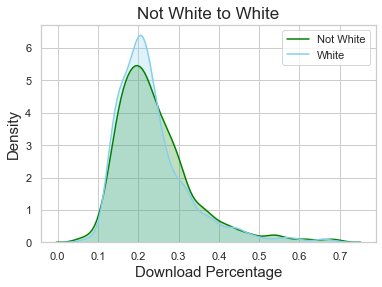

In [51]:
p1=sns.kdeplot(not_white_df['dl_percent'], shade=True, color="green", label='Not White')
p1=sns.kdeplot(white_df['dl_percent'], shade=True, color="skyblue", label='White')
p1.legend()
p1.set_title('Not White to White', fontsize=17)
p1.set_ylabel('Density', fontsize=15)
p1.set_xlabel('Download Percentage', fontsize=15);
res = stats.mannwhitneyu(not_white_df['dl_percent'], white_df['dl_percent'], alternative="less")
print("p-value for (not white) > (white): {:2.3f}".format(res.pvalue))

###### Conclusion
    Since our p-value is so high, we failed to reject the null hypothesis:
    Non-white pictures are more engaging than white pictures

### Non-black to black
    H0: P(non-Black) > P(Black)
    H1: P(non-Black) < P(Black)

In [54]:
# Seperate colors
not_black_df = Unsplash_df[Unsplash_df['main_color'] != 'black']
black_df = Unsplash_df[Unsplash_df['main_color'] == 'black']

In [ ]:
# jitter_plot(not_black_df['dl_percent'], m='Not Black');
# jitter_plot(black_df['dl_percent'], m='Black', c='black');

p-value for (not black) > (black): 0.894


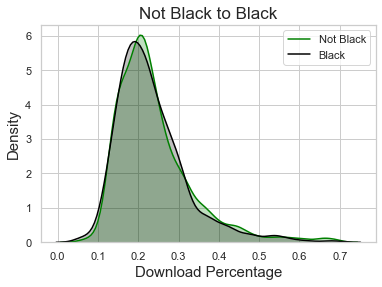

In [58]:
p1=sns.kdeplot(not_black_df['dl_percent'], shade=True, color="green", label='Not Black')
p1=sns.kdeplot(black_df['dl_percent'], shade=True, color="black", label='Black')
p1.legend()
p1.set_title('Not Black to Black', fontsize=17)
p1.set_ylabel('Density', fontsize=15)
p1.set_xlabel('Download Percentage', fontsize=15);
res = stats.mannwhitneyu(not_black_df['dl_percent'], black_df['dl_percent'], alternative="less")
print("p-value for (not black) > (black): {:2.3f}".format(res.pvalue))

###### Conclusion
    Since our p-value is so high, we failed to reject the null hypothesis:
    Non-Black pictures are more engaging than Black pictures

### Non-Yellow to Yellow
    H0: P(non-Yellow) > P(Yellow)
    H1: P(non-Yellow) < P(Yellow)

In [60]:
# Seperate colors
not_yell_df = Unsplash_df[Unsplash_df['main_color'] != 'yellow']
yell_df = Unsplash_df[Unsplash_df['main_color'] == 'yellow']

In [ ]:
# jitter_plot(not_yell_df['dl_percent'], m='Not Yellow');
# jitter_plot(yell_df['dl_percent'], m='Yellow', c='yellow');

p-value for (not yellow) > (yellow): 0.001


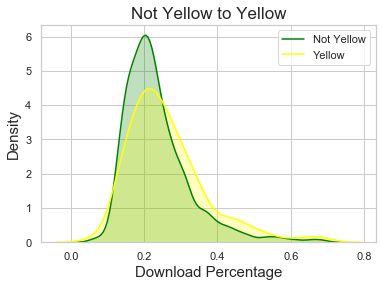

In [61]:
p1=sns.kdeplot(not_yell_df['dl_percent'], shade=True, color="green", label='Not Yellow')
p1=sns.kdeplot(yell_df['dl_percent'], shade=True, color="yellow", label='Yellow')
p1.legend()
p1.set_title('Not Yellow to Yellow', fontsize=17)
p1.set_ylabel('Density', fontsize=15)
p1.set_xlabel('Download Percentage', fontsize=15);
res = stats.mannwhitneyu(not_yell_df['dl_percent'], yell_df['dl_percent'], alternative="less")
print("p-value for (not yellow) > (yellow): {:2.3f}".format(res.pvalue))

###### Conclusion
    Since our p-value is below our alpha (0.1), we reject the null hypothesis in place of the aleternative:
    Non-yellow pictures are less engaging than yellow pictures

### Non-Red to Red
    H0: P(non-Red) > P(Red)
    H1: P(non-Red) < P(Red)

In [62]:
# Seperate colors
not_red_df = Unsplash_df[Unsplash_df['main_color'] != 'red']
red_df = Unsplash_df[Unsplash_df['main_color'] == 'red']

In [ ]:
# jitter_plot(not_red_df['dl_percent'], m='Not Red');
# jitter_plot(red_df['dl_percent'], m='Red', c='red');

p-value for (not red) > (red): 0.198


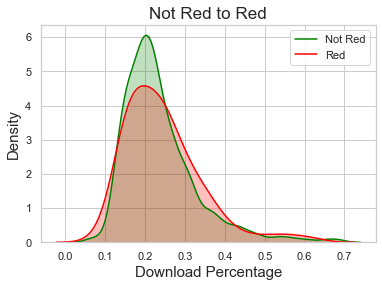

In [63]:
p1=sns.kdeplot(not_red_df['dl_percent'], shade=True, color="green", label='Not Red')
p1=sns.kdeplot(red_df['dl_percent'], shade=True, color="red", label='Red')
p1.legend()
p1.set_title('Not Red to Red', fontsize=17)
p1.set_ylabel('Density', fontsize=15)
p1.set_xlabel('Download Percentage', fontsize=15);
res = stats.mannwhitneyu(not_red_df['dl_percent'], red_df['dl_percent'], alternative="less")
print("p-value for (not red) > (red): {:2.3f}".format(res.pvalue))

###### Conclusion
    Since our p-value not below our alpha (0.5), we fail to reject the null hypothesis:
    Non-red pictures are more engaging than red pictures

### Non-Cyan to Cyan
H0: P(non-Cyan) > P(Cyan) \
H1: P(non-Cyan) $\le$ P(Cyan)

In [64]:
# Seperate colors
not_cyan_df = Unsplash_df[Unsplash_df['main_color'] != 'cyan']
cyan_df = Unsplash_df[Unsplash_df['main_color'] == 'cyan']

In [ ]:
# jitter_plot(not_cyan_df['dl_percent'], m='Not cyan');
# jitter_plot(cyan_df['dl_percent'], m='cyan', c='cyan');

p-value for (not cyan) > (cyan): 0.006


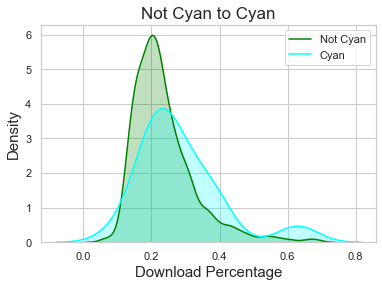

In [65]:
p1=sns.kdeplot(not_cyan_df['dl_percent'], shade=True, color="green", label='Not Cyan')
p1=sns.kdeplot(cyan_df['dl_percent'], shade=True, color="cyan", label='Cyan')
p1.legend()
p1.set_title('Not Cyan to Cyan', fontsize=17)
p1.set_ylabel('Density', fontsize=15)
p1.set_xlabel('Download Percentage', fontsize=15);
res = stats.mannwhitneyu(not_cyan_df['dl_percent'], cyan_df['dl_percent'], alternative="less")
print("p-value for (not cyan) > (cyan): {:2.3f}".format(res.pvalue))

###### Conclusion
    Since our p-value is below our alpha (0.5), we reject the null hypothesis:
    Non-cyan pictures are less engaging than cyan pictures

# Holistic Multi Plots

In [ ]:
plt.subplots(1, figsize=(12,10))
sns.heatmap(Unsplash_df[['views', 'likes', 'downloads', 'user.total_photos', 'exif.aperture', 'dl_percent']].corr(), annot=True);

In [ ]:
pd.plotting.scatter_matrix(Unsplash_df[['views', 'likes', 'downloads', 'user.total_photos', 'exif.aperture', 'dl_percent']].applymap(lambda x:x*1), alpha=0.2, figsize=(12,12), diagonal='kde');

# Mapping Lat and Long

In [ ]:
map_df = full_df[['user.username', 'location.position.latitude', 'location.position.longitude']].dropna()
map_df

In [ ]:
m = folium.Map([46.196358, 6.473567], zoom_start=11)
m

In [ ]:
for index, row in map_df.iterrows():
    folium.CircleMarker([row['location.position.latitude'], row['location.position.longitude']],
                        radius=15,
                        popup=row['user.username'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [ ]:
stationArr = map_df[['location.position.latitude', 'location.position.longitude']].as_matrix()
m.add_children(plugins.HeatMap(stationArr, radius=15))
m